


## Do your importing and your setup

In [141]:
import pandas as pd


## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [142]:
df = pd.read_excel("/home/abstech151/assignments/homework6/dogs/NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows=10000)

#df = pd.read_excel("/home/abstech151/assignments/homework5/richpeople.xlsx")

## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [143]:
#df.head(20)
#df.dtypes
df.shape
#had to do this with less data b/c it was rough on my computer

(10000, 15)

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [144]:
#Each row describes a dog in NYC and its license status. "Animal Name" gives its proper name. "Vaccinated" gives a yes/no status.

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

How many dogs live in the zipcode 10025?
How many breeds of dogs are there in NY?
What is the most common dog name?
What is the split between male and female dogs?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

Text(0.5, 0, 'Breeds')

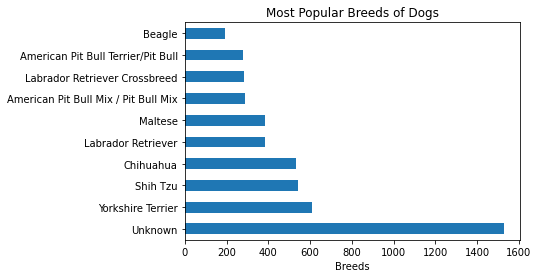

In [145]:
import matplotlib.pyplot as plt
df.columns
df['Primary Breed'].value_counts().head(10).plot(kind='barh')
plt.title("Most Popular Breeds of Dogs")
plt.xlabel('Breeds')

In [146]:
## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

Text(0.5, 0, 'Breeds')

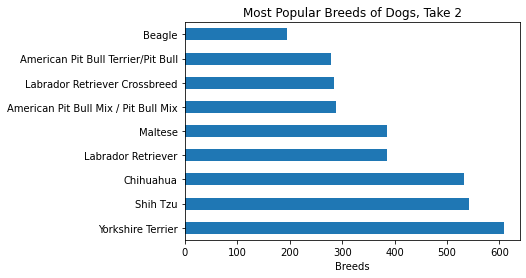

In [147]:
df['Primary Breed'].value_counts().head(10).drop('Unknown').plot(kind='barh')
plt.title("Most Popular Breeds of Dogs, Take 2")
plt.xlabel('Breeds')

## What are the most popular dog names?

In [148]:
df['Animal Name'].value_counts().head(10)

Bella                    70
Max                      68
Unknown                  58
Charlie                  55
Lola                     51
Lucy                     50
Rocky                    43
Buddy                    41
UNKNOWN                  40
Dog Name Not Provided    39
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [149]:
count_Anna = (df['Animal Name'] == 'Anna').sum()
print(count_Anna)

0


In [150]:
count_Max = (df['Animal Name'] == 'Max').sum()
print(count_Max)

68


In [151]:
count_Maxwell = (df['Animal Name'] == 'Maxwell').sum()
print(count_Maxwell)

2


## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [152]:
#df['Guard or Trained'].dropna().value_counts()
df['Guard or Trained'].value_counts(normalize=True)

No     0.999054
Yes    0.000946
Name: Guard or Trained, dtype: float64

In [153]:
is_guarddog=(df['Guard or Trained'] == 'Yes').sum()
totaldogs=df['Guard or Trained'].count()
print(((is_guarddog/totaldogs)*100).round(2), "percent of dogs are guard dogs.")

0.09 percent of dogs are guard dogs.


## What are the actual numbers?

In [154]:
#count_trained=(df['Guard or Trained'] == 'Yes').sum()
#print(count_trained)
df['Guard or Trained'].value_counts()

No     6335
Yes       6
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [155]:
df.head(2)
df.shape

(10000, 15)

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [156]:
#import numpy as np
#df['Guard or Trained'] = df['Guard or Trained'].replace({
#    np.nan, 'No'
#})
#reinflate the data
#df['Guard or Trained']=df['Guard or Trained'].fillna('No', inplace=True)
df['Guard or Trained'].fillna('No', inplace=True)
df.shape


(10000, 15)

## What are the top dog breeds for guard dogs? 

In [157]:
df.groupby('Guard or Trained')['Primary Breed'].describe()


,count,unique,top,freq
Guard or Trained,,,,
No,9994,204,Unknown,1525
Yes,6,4,Unknown,3


## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [158]:
df['Year']=df['Animal Birth'].apply(lambda birth: birth.year)
df['Year'].head()

0    2007
1    2013
2    2014
3    2008
4    2014
Name: Year, dtype: int64

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [159]:
df['Age']=(2021-(df['Year']))
df.head()
df['Age'].mean().round(2)
df['Age'].describe()


count    10000.000000
mean        11.698500
std          3.909594
min          6.000000
25%          8.000000
50%         11.000000
75%         14.000000
max         33.000000
Name: Age, dtype: float64

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [162]:
 
df_zip = pd.read_csv("/home/abstech151/assignments/homework6/dogs/zipcodes-neighborhoods.csv")


In [163]:
## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [164]:
df_zip.head(2)
#df.dtypes

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx


In [165]:
df = df.rename(columns={
    'Owner Zip Code' : 'zipcode',
    'key_0': 'key',
    'Primary Breed': 'breed',
    'Guard or Trained' : 'guard',
    'Animal Name': 'name',
    'Animal Gender': 'gender',
    'Spayed or Neut': 'spayed'
})

In [166]:
df = df.merge(df_zip, left_on='zipcode', right_on= 'zip')
df.head()

,zipcode,name,gender,breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,spayed,guard,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,zip,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,14,Upper West Side,10024,Manhattan
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,13,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,10,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,No,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,10,Upper West Side,10024,Manhattan
4,10024,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,14,Upper West Side,10024,Manhattan


## What is the most common dog breed in each of the neighborhoods of NYC?

In [167]:
#df = df.dropna(subset=['neighborhood'])
df = df.rename(columns={
    'neighborhood' : 'area',
    'borough': 'boro'
})
df.head(3)

,zipcode,name,gender,breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,spayed,guard,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,area,zip,boro
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,14,Upper West Side,10024,Manhattan
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,13,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,10,Upper West Side,10024,Manhattan


In [168]:
df.groupby('area').breed.value_counts().groupby(level=0).nlargest(1)

area                           area                           breed    
Borough Park                   Borough Park                   Unknown       29
Bronx Park and Fordham         Bronx Park and Fordham         Unknown       22
Bushwick and Williamsburg      Bushwick and Williamsburg      Unknown       30
Canarsie and Flatlands         Canarsie and Flatlands         Unknown       20
Central Bronx                  Central Bronx                  Unknown       13
Central Brooklyn               Central Brooklyn               Unknown       31
Central Harlem                 Central Harlem                 Unknown       28
Central Queens                 Central Queens                 Unknown       14
Chelsea and Clinton            Chelsea and Clinton            Unknown       69
East Harlem                    East Harlem                    Unknown       16
East New York and New Lots     East New York and New Lots     Unknown        9
Flatbush                       Flatbush                    

In [169]:
df.groupby('area').breed\
    .value_counts() \
    .groupby(level=0, group_keys=False) \
    .nlargest(3) \
    .to_frame()

breed
area                   breed                               
Borough Park           Unknown                           29
                       Yorkshire Terrier                 13
                       Labrador Retriever Crossbreed      9
Bronx Park and Fordham Unknown                           22
                       Chihuahua                         15
...                                                     ...
West Central Queens    Yorkshire Terrier                 29
                       Shih Tzu                          15
West Queens            Unknown                           66
                       Shih Tzu                          26
                       Chihuahua                         22

[126 rows x 1 columns]

In [170]:
df[df['boro'] == 'Brooklyn']['name'].value_counts().head()

Unknown                  27
Bella                    22
Dog Name Not Provided    19
Max                      18
Ruby                     16
Name: name, dtype: int64

In [171]:
df[df['boro'] == 'Bronx']['name'].value_counts().head()

Bella       9
Rocky       8
Princess    6
Max         6
Buddy       5
Name: name, dtype: int64

In [172]:
df[df['area'] == 'Lower East Side']['name'].value_counts().head()

UNKNOWN    4
Lucy       3
Lily       3
Cody       3
Buddy      3
Name: name, dtype: int64

In [173]:
#df.columns
#df.dtypes
df.groupby('area').breed.value_counts().groupby(level=0).head().to_frame()

breed
area         breed                               
Borough Park Unknown                           29
             Yorkshire Terrier                 13
             Labrador Retriever Crossbreed      9
             Chihuahua                          8
             Maltese                            8
...                                           ...
West Queens  Unknown                           66
             Shih Tzu                          26
             Chihuahua                         22
             Maltese                           21
             Yorkshire Terrier                 21

[210 rows x 1 columns]

## What breed of dogs are the least likely to be spayed? Male or female?

In [174]:
#spayed is object
df_notspayed = df[df['spayed']!='Yes']
df_notspayed=df_notspayed.groupby('breed', sort=False).spayed.value_counts()
df_notspayed.head(5)


breed                          spayed
Yorkshire Terrier              No        161
Cavalier King Charles Spaniel  No         17
Unknown                        No        135
Poodle, Toy                    No         28
Cocker Spaniel                 No         32
Name: spayed, dtype: int64

In [175]:
df.groupby('gender')['spayed'].value_counts()

gender  spayed
        Yes          1
F       Yes       3925
        No         528
M       Yes       4450
        No         950
Name: spayed, dtype: int64

In [176]:
df.groupby('gender')['spayed'].describe()

,count,unique,top,freq
gender,,,,
,1,1,Yes,1
F,4453,2,Yes,3925
M,5400,2,Yes,4450


In [177]:
df.groupby('gender')['spayed'].value_counts(normalize=True)

gender  spayed
        Yes       1.000000
F       Yes       0.881428
        No        0.118572
M       Yes       0.824074
        No        0.175926
Name: spayed, dtype: float64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [178]:
#where condition where values of two variable are the same pandas#df['monochrome'] = np.where((df.Value_1 > 1000) | (df.Value_2 > 15000), 'Y', 'N')
#df['monochrome'] = np.where((df['color1'] == 'black') | (df['color2'] == 'white') | (df['color1'] == 'grey'), 'Y', 'N')

In [179]:
# this is an awful, long, complicated way to do it
df['monochrome'] = (
    (df['Animal Dominant Color'].str.lower() == 'black') |
    (df['Animal Dominant Color'].str.lower() == 'white') |
    (df['Animal Dominant Color'].str.lower() == 'grey') |
    (df['Animal Dominant Color'].isna())
) & (
    (df['Animal Secondary Color'].str.lower() == 'black') |
    (df['Animal Secondary Color'].str.lower() == 'white') |
    (df['Animal Secondary Color'].str.lower() == 'grey') |
    (df['Animal Secondary Color'].isna())
) & (
    (df['Animal Third Color'].str.lower() == 'black') |
    (df['Animal Third Color'].str.lower() == 'white') |
    (df['Animal Third Color'].str.lower() == 'grey') |
    (df['Animal Third Color'].isna())
    
)
df['monochrome'].value_counts()

False    7505
True     2349
Name: monochrome, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

Text(0.5, 0, 'Number of Dogs')

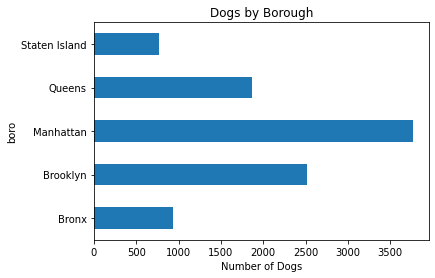

In [180]:
df.groupby('boro').size().plot(kind='barh')
#df.groupby('area').breed.value_counts()
plt.title("Dogs by Borough")
plt.xlabel('Number of Dogs')

<AxesSubplot:>

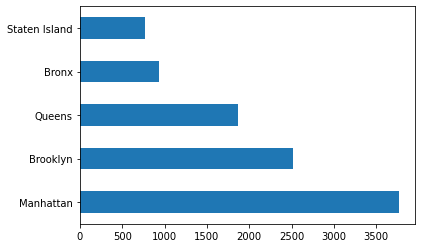

In [181]:
#same result?
df['boro'].value_counts().plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [182]:
counts = df['boro'].value_counts().reset_index()
counts

,index,boro
0,Manhattan,3764
1,Brooklyn,2518
2,Queens,1866
3,Bronx,931
4,Staten Island,775


In [183]:

df_pop = pd.read_csv("/home/abstech151/assignments/homework6/dogs/boro_population.csv")
df_pop.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [191]:
df_percap = df.merge(df_pop, left_on='boro', right_on= 'borough')
df_percap.head(2)

,zipcode,name,gender,breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,spayed,...,License Expired Date,Year,Age,area,zip,boro,monochrome,borough,population,area_sqmi
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,2016-09-19,2007,14,Upper West Side,10024,Manhattan,False,Manhattan,1644518,23
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,...,2017-09-03,2008,13,Upper West Side,10024,Manhattan,False,Manhattan,1644518,23


In [192]:
#need to sum the number of dogs by boro
#group by boro, count the number of dogs, divide by population
df_percap.groupby('boro').size()

boro
Bronx             931
Brooklyn         2518
Manhattan        3764
Queens           1866
Staten Island     775
dtype: int64

In [193]:
df_percap = counts.merge(df_percap, left_on='index', right_on='boro')
df_percap

,index,boro_x,zipcode,name,gender,breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,...,License Expired Date,Year,Age,area,zip,boro_y,monochrome,borough,population,area_sqmi
0,Manhattan,3764,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,...,2016-09-19,2007,14,Upper West Side,10024,Manhattan,False,Manhattan,1644518,23
1,Manhattan,3764,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,...,2017-09-03,2008,13,Upper West Side,10024,Manhattan,False,Manhattan,1644518,23
2,Manhattan,3764,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,...,2017-10-11,2011,10,Upper West Side,10024,Manhattan,False,Manhattan,1644518,23
3,Manhattan,3764,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,...,2019-09-18,2011,10,Upper West Side,10024,Manhattan,False,Manhattan,1644518,23
4,Manhattan,3764,10024,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,...,2016-08-20,2007,14,Upper West Side,10024,Manhattan,False,Manhattan,1644518,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9849,Staten Island,775,10302,SAMMY,M,Pug,NaN,TAN,BLACK,NaN,...,2016-06-11,2007,14,Port Richmond,10302,Staten Island,False,Staten Island,474558,59
9850,Staten Island,775,10302,Michelle,F,American Pit Bull Terrier/Pit Bull,NaN,Brindle,NaN,NaN,...,2016-05-16,2014,7,Port Richmond,10302,Staten Island,False,Staten Island,474558,59
9851,Staten Island,775,10302,BOOTSBROWN,M,Unknown,NaN,Black,Brown,White,...,2016-05-30,2001,20,Port Richmond,10302,Staten Island,False,Staten Island,474558,59
9852,Staten Island,775,10302,chloe,F,Labrador Retriever,NaN,CHOCOLATE,BROWN,NaN,...,2016-06-12,2013,8,Port Richmond,10302,Staten Island,False,Staten Island,474558,59


In [194]:
df_percap['per_capita'] = df_percap['boro_x'] / df_percap['population'] * 1000
df_percap

,index,boro_x,zipcode,name,gender,breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,...,Year,Age,area,zip,boro_y,monochrome,borough,population,area_sqmi,per_capita
0,Manhattan,3764,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,...,2007,14,Upper West Side,10024,Manhattan,False,Manhattan,1644518,23,2.288817
1,Manhattan,3764,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,...,2008,13,Upper West Side,10024,Manhattan,False,Manhattan,1644518,23,2.288817
2,Manhattan,3764,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,...,2011,10,Upper West Side,10024,Manhattan,False,Manhattan,1644518,23,2.288817
3,Manhattan,3764,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,...,2011,10,Upper West Side,10024,Manhattan,False,Manhattan,1644518,23,2.288817
4,Manhattan,3764,10024,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,...,2007,14,Upper West Side,10024,Manhattan,False,Manhattan,1644518,23,2.288817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9849,Staten Island,775,10302,SAMMY,M,Pug,NaN,TAN,BLACK,NaN,...,2007,14,Port Richmond,10302,Staten Island,False,Staten Island,474558,59,1.633099
9850,Staten Island,775,10302,Michelle,F,American Pit Bull Terrier/Pit Bull,NaN,Brindle,NaN,NaN,...,2014,7,Port Richmond,10302,Staten Island,False,Staten Island,474558,59,1.633099
9851,Staten Island,775,10302,BOOTSBROWN,M,Unknown,NaN,Black,Brown,White,...,2001,20,Port Richmond,10302,Staten Island,False,Staten Island,474558,59,1.633099
9852,Staten Island,775,10302,chloe,F,Labrador Retriever,NaN,CHOCOLATE,BROWN,NaN,...,2013,8,Port Richmond,10302,Staten Island,False,Staten Island,474558,59,1.633099


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

In [195]:
#df.groupby('boro').breed.value_counts().nlargest(5)

In [196]:
df.groupby('boro').breed.value_counts() \
    .groupby(level=0, group_keys=False) \
    .nlargest(5) \
    .to_frame(name='counts') \
    .reset_index()

,boro,breed,counts
0,Bronx,Unknown,141
1,Bronx,Shih Tzu,84
2,Bronx,Yorkshire Terrier,81
3,Bronx,Chihuahua,79
4,Bronx,American Pit Bull Terrier/Pit Bull,71
5,Brooklyn,Unknown,371
6,Brooklyn,Yorkshire Terrier,174
7,Brooklyn,Shih Tzu,149
8,Brooklyn,Chihuahua,127
9,Brooklyn,American Pit Bull Mix / Pit Bull Mix,108


In [197]:
df.shape
# Delete rows where breed is unknown
df = df.loc[df['breed'] != "Unknown"]
df.shape
#df.dtypes
#df.head(3)

(8350, 21)

In [198]:
#df.groupby('boro').breed.value_counts().nlargest(5)
#watch soma video again

<AxesSubplot:ylabel='boro,breed'>

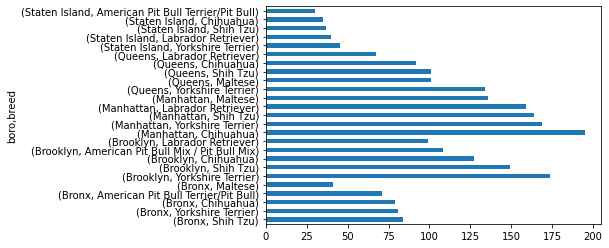

In [116]:
df.groupby('boro').breed.value_counts() \
    .groupby(level=0, group_keys=False) \
    .nlargest(5) \
    .plot(kind='barh')

<AxesSubplot:ylabel='boro,boro,breed'>

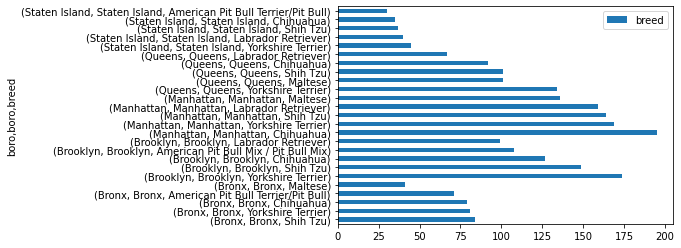

In [207]:
df_topdogs=pd.DataFrame(df.groupby('boro').breed.value_counts().groupby(level=0).nlargest(5))
#df_topdogs.reset_index().unstack().plot(kind='barh')
df_topdogs.plot(kind='barh')


<AxesSubplot:ylabel='boro,breed'>

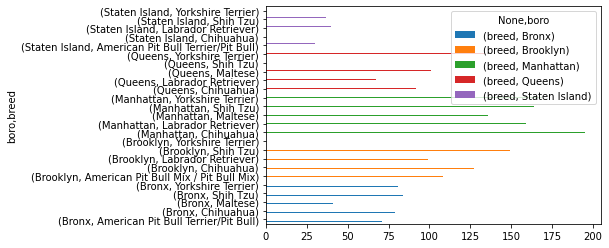

In [212]:
df_topdogs.unstack(0).plot(kind='barh')

## What percentage of dogs are not guard dogs?

In [199]:
df['guard'].value_counts(normalize=True, dropna=False)

No     0.999641
Yes    0.000359
Name: guard, dtype: float64

99.96% are not guard dogs. Before, I had it that 99.90% were not guard dogs.